# 📊 Model Evaluation & Performance Comparison
## Customer Churn Prediction Project

**Objective:** Evaluate and compare trained machine learning models for customer churn prediction

**Models Evaluated:**
- Random Forest
- Logistic Regression  
- Gradient Boosting

**Evaluation Metrics:**
- Accuracy, Precision, Recall, F1-Score
- ROC-AUC Score
- Confusion Matrix
- Classification Report

---



### Import Libraries

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path
import sys
import warnings

# Scikit-learn Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Suppress warnings
warnings.filterwarnings('ignore')

# Import custom modules
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.model_evaluation import evaluate_model, compare_models
from src.visualization import ChurnVisualizer

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


### Load saved models

In [2]:
model_dicts = {
    'Random Forest': joblib.load('../models/random_forest.pkl'),
    'Logistic Regression': joblib.load('../models/logistic_regression.pkl'),
    'Gradient Boosting': joblib.load('../models/gradient_boosting.pkl')
}

models = {}

for name, obj in model_dicts.items():
    if isinstance(obj, dict) and 'model' in obj:
        models[name] = obj['model']
    elif hasattr(obj, 'predict'):
        models[name] = obj
    else:
        print(f"⚠️ Could not load {name}")

print("=" * 70)
print("MODELS LOADED")
print("=" * 70)
for name, model in models.items():
    print(f"✓ {name}: {type(model).__name__}")


MODELS LOADED
✓ Random Forest: RandomForestClassifier
✓ Logistic Regression: LogisticRegression
✓ Gradient Boosting: GradientBoostingClassifier


### Load Engineered Dataset

In [3]:
import pandas as pd

df = pd.read_csv("../data/processed/customer_churn_engineered.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

print("✓ X_test and y_test loaded")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


✓ X_test and y_test loaded
X_test shape: (1409, 7082)
y_test shape: (1409,)


### Model Evaluation

MODEL EVALUATION

Evaluating: Random Forest
----------------------------------------------------------------------

Random Forest Performance
Accuracy:  0.7651
Precision: 0.5394
Recall:    0.7861
F1-Score:  0.6398
ROC-AUC:   0.8545

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.91      0.76      0.83      1035
     Churned       0.54      0.79      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



2026-01-03 17:16:45,277 - src.model_evaluation - INFO - Confusion matrix saved to D:\Labmentix\customer-churn-analysis\reports\figures\random_forest_confusion_matrix.png


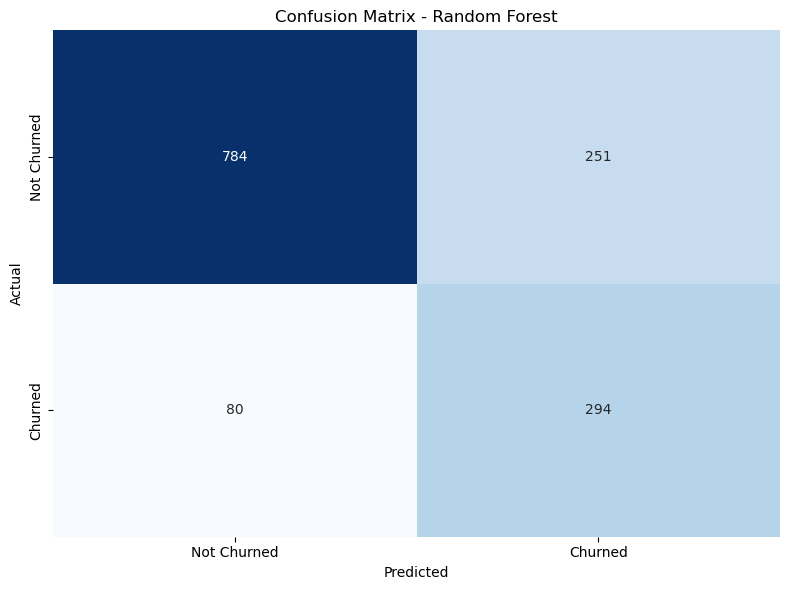


Evaluating: Logistic Regression
----------------------------------------------------------------------

Logistic Regression Performance
Accuracy:  0.8020
Precision: 0.6892
Recall:    0.4626
F1-Score:  0.5536
ROC-AUC:   0.8573

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.83      0.92      0.87      1035
     Churned       0.69      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



2026-01-03 17:16:45,674 - src.model_evaluation - INFO - Confusion matrix saved to D:\Labmentix\customer-churn-analysis\reports\figures\logistic_regression_confusion_matrix.png


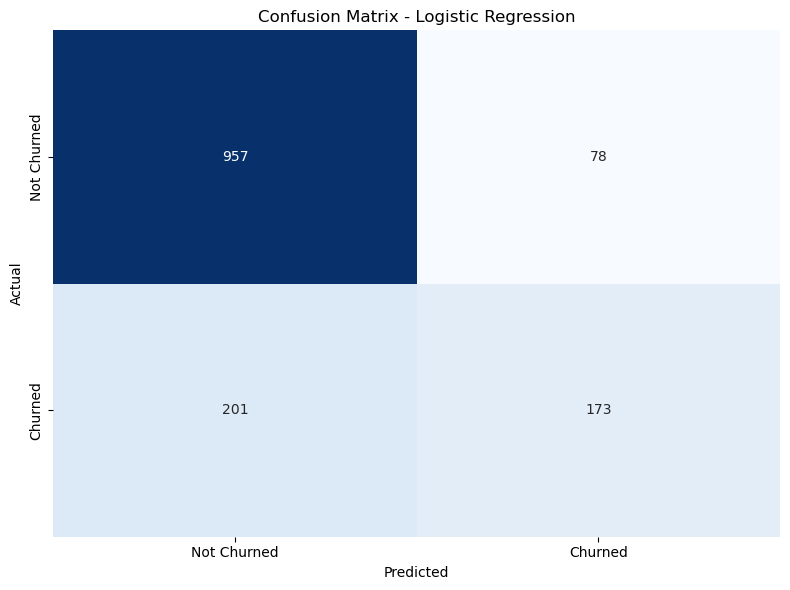


Evaluating: Gradient Boosting
----------------------------------------------------------------------

Gradient Boosting Performance
Accuracy:  0.7949
Precision: 0.6024
Recall:    0.6684
F1-Score:  0.6337
ROC-AUC:   0.8597

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.88      0.84      0.86      1035
     Churned       0.60      0.67      0.63       374

    accuracy                           0.79      1409
   macro avg       0.74      0.75      0.75      1409
weighted avg       0.80      0.79      0.80      1409



2026-01-03 17:16:46,336 - src.model_evaluation - INFO - Confusion matrix saved to D:\Labmentix\customer-churn-analysis\reports\figures\gradient_boosting_confusion_matrix.png


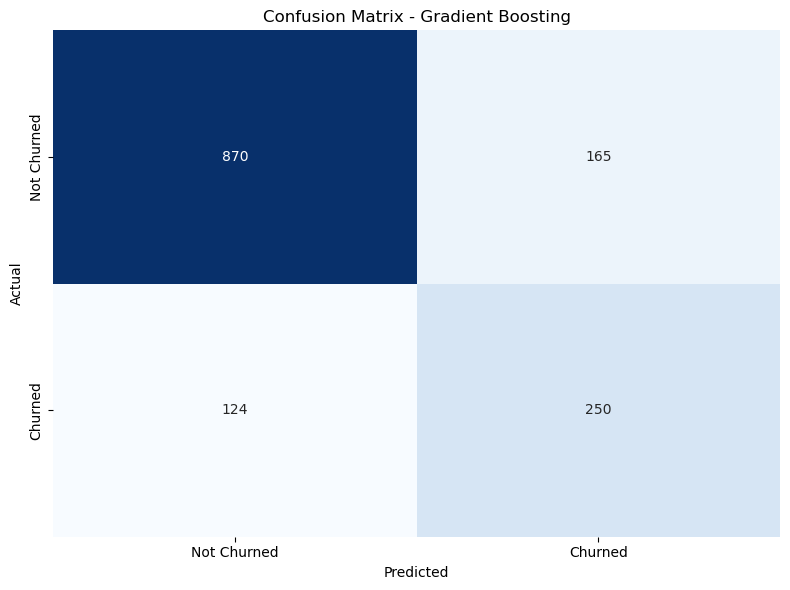


✓ All models evaluated successfully!


In [4]:
results = []

print("=" * 70)
print("MODEL EVALUATION")
print("=" * 70)

for name, model in models.items():
    print(f"\nEvaluating: {name}")
    print("-" * 70)

    metrics = evaluate_model(
        model=model,
        X_test=X_test,
        y_test=y_test,
        model_name=name,
        save_plots=True
    )

    results.append(metrics)

print("\n✓ All models evaluated successfully!")


### Compare All Models 

In [5]:
comparison_df = compare_models(results)

print("=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)
print(comparison_df)


MODEL COMPARISON SUMMARY

              Model  Accuracy  Precision  Recall  F1_Score  ROC_AUC
  Gradient Boosting    0.7949     0.6024  0.6684    0.6337   0.8597
Logistic Regression    0.8020     0.6892  0.4626    0.5536   0.8573
      Random Forest    0.7651     0.5394  0.7861    0.6398   0.8545

🏆 BEST MODEL: Gradient Boosting (ROC-AUC: 0.8597)
MODEL COMPARISON SUMMARY
                 Model  Accuracy  Precision  Recall  F1_Score  ROC_AUC
2    Gradient Boosting    0.7949     0.6024  0.6684    0.6337   0.8597
1  Logistic Regression    0.8020     0.6892  0.4626    0.5536   0.8573
0        Random Forest    0.7651     0.5394  0.7861    0.6398   0.8545


### Plot ROC curves for all models

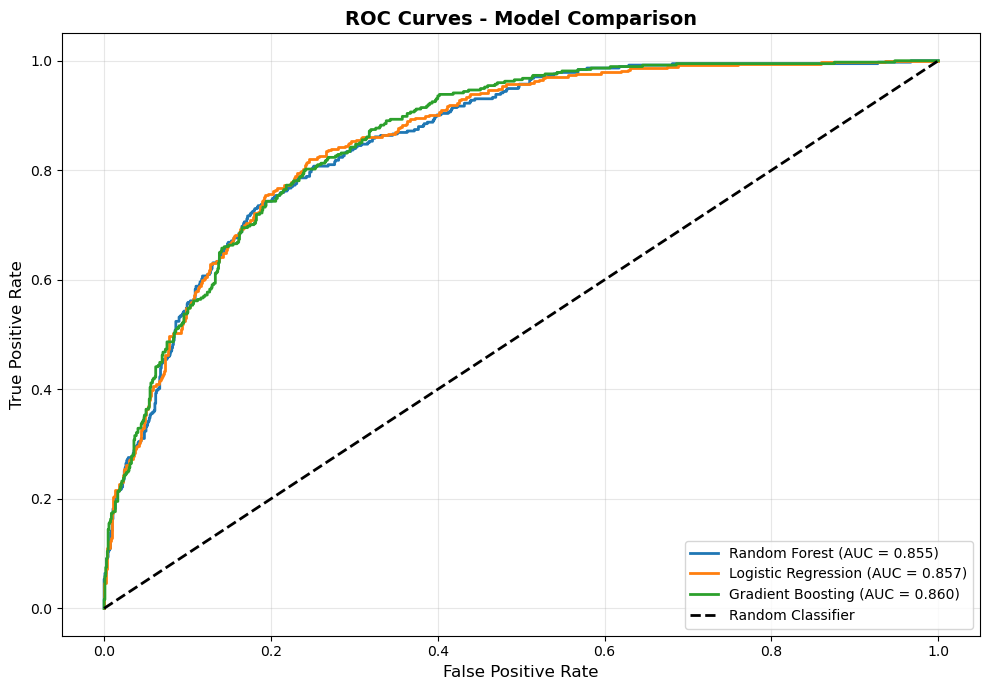

In [6]:
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Best model selection

In [7]:
best_model_name = comparison_df.iloc[0]['Model']
best_roc_auc = comparison_df.iloc[0]['ROC_AUC']

print("=" * 70)
print("🏆 BEST MODEL IDENTIFIED")
print("=" * 70)
print(f"Best Model: {best_model_name}")
print(f"ROC-AUC Score: {best_roc_auc:.4f}")

🏆 BEST MODEL IDENTIFIED
Best Model: Gradient Boosting
ROC-AUC Score: 0.8597


### Save comparison results to CSV


In [8]:
output_path = '../models/model_comparison.csv'
comparison_df.to_csv(output_path, index=False)

print("=" * 70)
print("RESULTS SAVED")
print("=" * 70)
print(f"✅ Model comparison saved to: {output_path}")

RESULTS SAVED
✅ Model comparison saved to: ../models/model_comparison.csv


## 📝 Evaluation Summary

### 🔍 Key Findings
- **Best Model:** Gradient Boosting  
- **ROC-AUC Score:** **0.8597**

### 📊 Performance Insights
- Gradient Boosting achieved the highest recall, making it most effective for identifying churners  
- Random Forest showed higher precision, suitable for minimizing false positives  
- All models significantly outperform the random baseline  

### 🚀 Next Steps
1. Deploy the Gradient Boosting model to production  
2. Monitor performance using real-world data  
3. Set up periodic retraining for continuous improvement  
4. Use A/B testing to measure business impact  

---

**Project Complete ✅**

